In [24]:
%reload_ext autoreload
%autoreload 2

In [2]:
import network

In [3]:
import gzip
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
f = gzip.open('../samples/train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 100
total_images = 60000

f.read(16)

X = np.empty(shape=(1, image_size, image_size))

for i in range(total_images // num_images):
    buf = f.read(image_size * image_size * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = data.reshape(num_images, image_size, image_size)    
    X = np.concatenate((X, data), axis = 0)

In [5]:
f = gzip.open('../samples/train-labels-idx1-ubyte.gz','r')
f.read(8)

y = np.empty((1))

for i in range(total_images):   
    buf = f.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    y = np.concatenate((y, labels), axis = 0)

y = y.astype(np.int32)
print(y)

[0 5 0 ... 5 6 8]


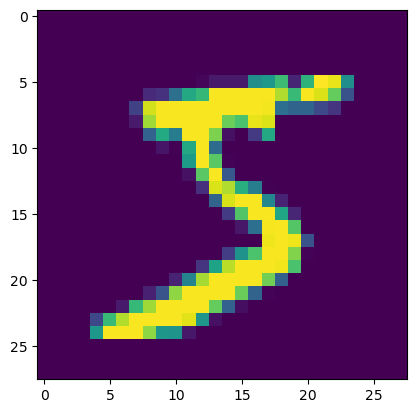

In [6]:
image = np.asarray(X[1]).reshape((28, 28))
plt.imshow(image)
plt.show()

In [7]:
X_train = X[1:].reshape((total_images, image_size ** 2))
X_train.shape

(60000, 784)

In [8]:
y_train = y[1:].astype(np.int32)
y_train = np.array([([0] * i + [1] + [0] * (9 - i)) for i in y_train])
y_train.shape

(60000, 10)

In [9]:
model = network.Network(inputDim=image_size ** 2, intializationScheme='glorot-uniform')
model.addLayer(dim = 300, activation='sigmoid')
model.addLayer(dim = 10, activation='softmax')
model.compile(loss='cat-crossentropy', optimizer='gd', batch_type="mbgd", batch_size=100)

Epoch 1: calculated loss = 0.485179897399 | calculated accuracy = 0.87188
Epoch 2: calculated loss = 0.300702086383 | calculated accuracy = 0.91735
Epoch 3: calculated loss = 0.259140712057 | calculated accuracy = 0.92725
Epoch 4: calculated loss = 0.238319770908 | calculated accuracy = 0.93323
Epoch 5: calculated loss = 0.225311720595 | calculated accuracy = 0.93642
Epoch 6: calculated loss = 0.208365169319 | calculated accuracy = 0.94110
Epoch 7: calculated loss = 0.207624598295 | calculated accuracy = 0.94228
Epoch 8: calculated loss = 0.191581754332 | calculated accuracy = 0.94595
Epoch 9: calculated loss = 0.186314652845 | calculated accuracy = 0.94740
Epoch 10: calculated loss = 0.182874133102 | calculated accuracy = 0.94848
Epoch 11: calculated loss = 0.173189405650 | calculated accuracy = 0.94988
Epoch 12: calculated loss = 0.171363031036 | calculated accuracy = 0.95108
Epoch 13: calculated loss = 0.166327045023 | calculated accuracy = 0.95315
Epoch 14: calculated loss = 0.1621

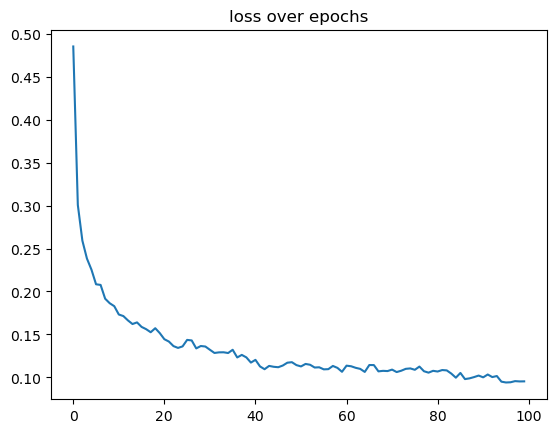

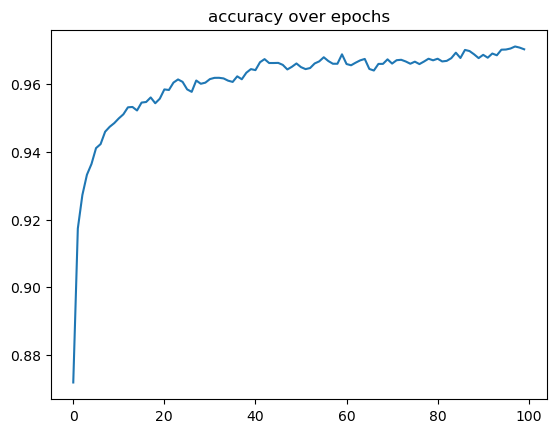

In [10]:
model.train(X_train.T, y_train.T, alpha=0.05, epochs = 100)

In [11]:
f = gzip.open('../samples/t10k-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 100
total_images = 10000

f.read(16)

X_test = np.empty(shape=(1, image_size, image_size))

for i in range(total_images // num_images):
    buf = f.read(image_size * image_size * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = data.reshape(num_images, image_size, image_size)    
    X_test = np.concatenate((X_test, data), axis = 0)
    
X_test = X_test[1:].reshape((total_images, image_size ** 2))
X_test.shape

(10000, 784)

In [12]:
f = gzip.open('../samples/t10k-labels-idx1-ubyte.gz','r')
f.read(8)

y_test = np.empty((1))

for i in range(total_images):   
    buf = f.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    y_test = np.concatenate((y_test, labels), axis = 0)

y_test = y_test.astype(np.int32)
y_test = y_test[1:].astype(np.int32)
y_test = np.array([([0] * i + [1] + [0] * (9 - i)) for i in y_test])
y_test.shape

(10000, 10)

In [13]:
pred, cf, accuracy = model.predict(X_test.T, y_test.T)
print(f"testing accuracy on mnist testing dataset: {100 * accuracy:.2f}%")

testing accuracy on mnist testing dataset: 95.83%


In [14]:
d = pd.DataFrame()
d["actual"] = np.where(y_test == 1)[1]
v = []
for p in pred.T:
    if 1 in p:
        v.append(np.where(p == 1)[0][0])
    else:
        v.append(np.nan)
d["predicted"] = np.array(v).astype(np.int)

In [15]:
d

,actual,predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


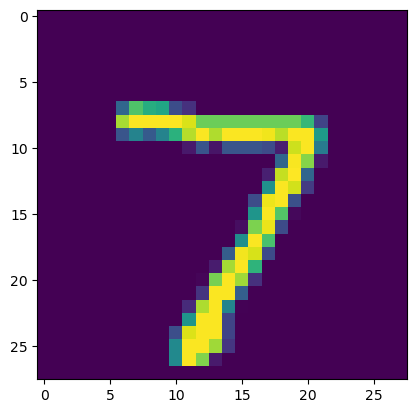

In [16]:
image = np.asarray(X_test[0]).reshape((28, 28))
plt.imshow(image)
plt.show()

In [37]:
model.flushnn()

neural network flushed to ann.json


In [38]:
model.loadnn("ann.json")

loaded neural network from ann.json
dict_keys(['activations', 'batch_size', 'batch_type', 'dims', 'gen', 'intializationScheme', 'loss', 'optimizer', 'outputs'])
dict_keys(['activation', 'initializationScheme', 'W', 'b'])
